In [183]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from pydantic import BaseModel
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [184]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [185]:
groq_api_key = os.getenv("GROQ_API_KEY")
if groq_api_key is not None:
	os.environ["GROQ_API_KEY"] = groq_api_key
else:
	raise ValueError("GROQ_API_KEY environment variable is not set.")

In [186]:
llm = ChatGroq(model="gemma2-9b-it", temperature=0.1, max_tokens=2000, stop_sequences=[])

In [187]:
class ChatState(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

In [188]:
def chat_node(state:ChatState):
    messages=state['messages']
    response=llm.invoke(messages)
    return {'messages':[response]}

In [189]:
checkpointer=MemorySaver()
graph=StateGraph(ChatState)

In [190]:
graph.add_node('chat_node',chat_node)
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

In [191]:
chatbot=graph.compile(checkpointer=checkpointer)

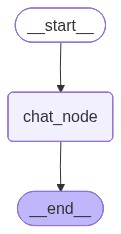

In [192]:
chatbot

In [ ]:
initial_state = {
    'messages': [HumanMessage(content="What is the capital of india")]
}
thread_id='1'
config={'configurable':{'thread_id':thread_id}}
chatbot.invoke(initial_state,config=config) # type:ignore

{'messages': [HumanMessage(content='What is the capital of india', id='19bcf01f-b9e6-40d7-a973-1eae5fd503be'),
  AIMessage(content='The capital of India is **New Delhi**. \n', response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 15, 'total_tokens': 28, 'completion_time': 0.023636364, 'prompt_time': 0.001268169, 'queue_time': 0.252240481, 'total_time': 0.024904533}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-20920724-cce9-47ae-b34e-feedd8452871-0', usage_metadata={'input_tokens': 15, 'output_tokens': 13, 'total_tokens': 28})]}

In [195]:
while True:
    user_message=input("Type here: ")
    print('User:',user_message)
    if user_message.strip().lower() in ['exit','quit','bye']:
        break
    response=chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)
    print('Bot:',response['messages'][-1].content)

User: hi
Bot: Hello! 👋 

How can I help you today? 😊  

User: myself gaurav
Bot: Nice to meet you, Gaurav! 👋

What can I do for you?  

User: whats my name
Bot: Your name is Gaurav, as you just told me! 😊  

Is there anything else I can help you with?

User: ok
Bot: Okay!  

Just let me know if you have any other questions or if there's anything else I can do.  I'm here to help. 😊

User: factorial of 100
Bot: That's a big one!  

The factorial of 100 (written as 100!) is a very large number.  It's calculated as:

100 * 99 * 98 * ... * 2 * 1

It would take a while to calculate that by hand!  

You can use a calculator or a computer program to find the exact value.  

Let me know if you'd like me to try and find it for you using a program. 😊 


User: what is its value
Bot: You're right, it's a massive number! 

The factorial of 100 (100!) is:

9,332,621,544,394,415,262,500 

It has 25 digits! 🤯 



User: write
Bot: Please give me something to write!  

For example, you could ask me to:

